# RMDS - Workshop 4
### Gaussian Process Regression

# Gaussian Process Regression 
### What is it?
- A Bayesian nonparametric regression technique
- A method of interpolation where the interpolated values are modeled via a Gaussian process

# Gaussian Process Regression (Pros and Cons)
### Advantages
- Predictions interpolate our observations
- Predictions come with quantification of uncertainty
- Flexible (Various kernels can be specified)
### Disadvantages
- Not sparse (need entire dataset to produce predictions)
- Lose efficiency in high dimensional spaces

# Gaussian Process Regression (History)
- Herman Wold (1938)
- Andrey Kolmogorov (1941)
- Norbert Wiener (1942)
- Danie Krige (1950s)
- Georges Matheron (1960s)
- Carl Rasmussen & Christopher Williams (1996-present)

# Gaussian Process Regression (A method by many names)
- Wiener-Kolmogorov Prediction
- Kriging
- Gaussian Process Regression

# KNN Classification
From Workshop 2:

|     |    |
| :------------- | :----------: |
| ![](figures/iris_raw_data.png)  | ![](figures/irisk-best-k.png)    |

# KNN Regression

|                 |              |
| :------------- | :----------: |
| ![](figures/sin.png)  | ![](figures/sin-knn.png)    |


# Ordinary Linear Regression

![](figures/ols.png)

$$ y = \theta^T X + \epsilon \; \; \; \epsilon \sim N(0, \sigma) $$

Solve via maximum likelihood:
$$ \hat \theta_{MLE} = \text{arg}\max_{\theta} L(\theta) = \text{arg}\max_{\theta} \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} exp \left \{ - \frac{(y_i - \theta^T x_i)}{2 \sigma^2} \right \}$$
Or equivalently (in this case) via least squares:
$$ min_{\theta} || \epsilon ||_2 = min_{\theta} \sum_{i=1}^n (y- y_i)^2 $$
$$ \hat \theta = (X^T X)^{-1}X^T y $$

# A Bayesian Perspective

\begin{align}
f(\theta | y) &= \frac{f(y| \theta) f(\theta)}{\int f(y| \theta) f(\theta) d \theta} \\
&= \text{constant} \times f(\theta) f(y | \theta) \\
&\propto f(\theta) L(\theta)
\end{align}
 
$$ \hat \theta_{MAP} = \text{arg} \max_{\theta} f(\theta | y) $$

# But what if our data is not linear?

![](figures/sin.png)  

$$ y = f(x) + \epsilon = \theta \phi(x) + \epsilon $$

$$ \hat \theta = (\phi^T \phi)^{-1} \phi^T y $$

# The Kernel Trick
$$ J(\theta) = \sum_{i=1}^n (y_i - \theta^T \phi(x_i))^2$$
Solve for $\theta$ yields
\begin{align*}
\hat \theta &= \sum_{i=1}^n (y_i - \theta^T \phi(x_i)) \phi(x_i)\\
&= \sum_{i=1}^n \alpha_i \phi(x_i) \\
&= \phi^T \alpha
\end{align*}

\begin{align*}
J(\theta) &= \sum_{i=1}^n (y_i - \theta^T \phi(x_i))^2\\
 &=(\mathbf{y} - \phi \theta)^T(\mathbf{y} - \phi \theta)\\
 &=\mathbf{y}^T\mathbf{y} - \mathbf{y}^T \phi \theta - \theta^T \phi^T \mathbf{y} + \theta^T \phi^T \phi \theta
\end{align*}


Rewriting in terms of $\alpha$ gives:
\begin{align*}
J(\alpha) &= \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \phi (\phi^T \alpha) - (\phi^T \alpha)^T \phi^T y + (\phi^T \alpha)^T \phi^T \phi (\phi^T \alpha)\\
&= \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \phi \phi^T \alpha - \alpha^T \phi \phi^T \mathbf{y} + \alpha^T \phi \phi^T \phi \phi^T \alpha \\
&= \mathbf{y}^T \mathbf{y} - \mathbf{y}^T K \alpha - \alpha^T K \mathbf{y} + \alpha^T KK \alpha
\end{align*}

# Reproducing Kernel Hilbert Spaces

Let $x,y \in \mathbb{R}^p$ and consider the space of functionals generated by the span of $\{K(\cdot, y), y \in \mathbb{R}^p\}$

These are functions of the form:
$$ f(x) = \sum_m \alpha_m K(x, y_m) $$

Suppose $K$ has an eigen-expansion
$$ K(x,y) = \sum_{i=1}^{\infty} \gamma_i \phi_i(x) \phi_i(y) $$
with $\gamma_i \geq 0$ and $\sum_{i=1}^{\infty}\gamma_i < \infty$

Then, elements of $\mathcal{H}_K$ have the form
$$ f(x) = \sum_{i=1}^{\infty} c_i \phi_i(x) $$

# Examples of Kernels (Polynomial Kernel)
 For $d$-degree polynomials, the polynomial kernel is defined by
    $$ (x^Ty + c)^d $$
    
A kernel $K$ corresponds to an inner product in some feature space based on some mapping $\phi$:
$$ k(x,y) = < \phi(x), \phi(y) > $$
For $d=2$, let's see what this feature map looks like. We have
$$ K(x,y) = (\sum_{i=1}^p x_i y_i + c)^2 = \sum_{i=1}^p x_i^2 y_i^2 + \sum_{i=2}^p \sum_{j=1}^{i-1} (\sqrt{2} x_i x_j)(\sqrt{2} y_i y_j) + \sum_{i=1}^p 2c \sqrt{x_i y_i} + c^2$$


# Examples of Kernels (Squared Exponential AKA RBF AKA Gaussian)

$$K(x,y) = \sigma^2 exp \left ( - \frac{(x - y)}{2 \ell^2} \right ) $$
Here, $\ell$ controls the wiggliness of functions generated by this kernel.

# Gaussian Random Fields (Gaussian Processes)
Representation: $\{Z(s) | s \in D \subset \mathbb{R}^d \}$
Suppose a model with additive error:
$$ Z(s) = \mu(s) + e(s)$$
The Gaussian process is completely specified by its mean and variance functions:
$$ \mu(s) = E[Z(s)]$$
$$ K(s,s') = Cov(s, s') = C(h) = Cov[e(s), e(s + h)] $$
This is given by a kernel function. e.g. Gaussian:
$$C(h) = exp \{ -h^2 / \ell^2 \} $$

# Samples of Gaussian Random Fields

|                 |              |
| :------------- | :----------: |
| ![](figures/grf10.png)  | ![](figures/grf1.png)    |

# Gaussian Processes Regression
The data:
$$ P(y_1, \dots, y_n | x_1, \dots, x_n) \sim N(\mathbf{f}, K) \; \; \; \; \; K_{i,j} = K(x_i, x_j) $$
Prediction:
$$ P(y_1, \dots, y_n, y_* | x_1, \dots, x_n, x_*) \sim N(\mathbf{f}_*, \Sigma) $$
$$ P(y_* | y_1, \dots, y_n, x_1, \dots, x_n, x_*) \sim N(K_*^TK^{-1} y,  K_{**} K^{-1} K_*) $$

Where 
$$ \Sigma = \begin{bmatrix} K & K_* \\ K_*^T & K_{**} \end{bmatrix} $$

# GP Regression (An example)

The data:
$$ X = \{0.01, 0.02, 0.025, 0.18, 0.19, 0.3, 0.67, .76, .79, 0.88, 0.88, 0.9 \} $$
$$ Y = \{ 3.75, 3.80, 3.70, 3.30, 3.45, 3.80, 3.65, 3.75, 3.00, 1.60, 1.55, 1.40 \} $$

![](figures/gp-data.png) 

In [22]:
import gpflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X = [0.01, 0.02, 0.025, 0.18, 0.19, 0.3, 0.67, .76, .79, 0.88, 0.88, 0.9]
Y = [3.75, 3.80, 3.70, 3.30, 3.45, 3.80, 3.65, 3.75, 3.00, 1.60, 1.55, 1.40]
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

k = gpflow.kernels.SquaredExponential()
m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=1000))

## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 20 samples from posterior
tf.random.set_seed(1)  # for reproducibility
samples = m.predict_f_samples(xx, 20)  # shape (10, 100, 1)

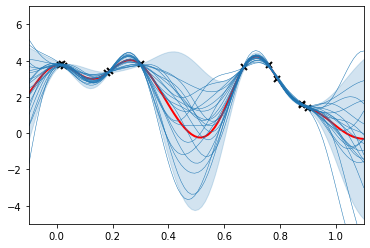

In [23]:
plt.figure()
plt.xlim(-.1, 1.1)
plt.ylim(-5, 7)
plt.plot(X, Y, "kx", mew=2)
plt.plot(xx, mean, "red", lw=2)
plt.fill_between(
    xx[:, 0],
    mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C0",
    alpha=0.2,
)

plt.plot(xx, samples[:, :, 0].numpy().T, "C0", linewidth=0.5)
_ = plt.xlim(-0.1, 1.1)


|                 |              |
| :------------- | :----------: |
| ![](figures/gp-data.png)  | ![](figures/gp-model.png)    |

# What if we chose a different value for $\sigma$ and $\ell$?


|                 |              |             |   |
| :------------- | ---------- |---------- | ----------: |
| ![](figures/gp-model-0_1-10.png)  | ![](figures/gp-model-0_1-1.png)    | ![](figures/gp-model-0_1-0_1.png)   | ![](figures/gp-model-1-0_1.png) |

# Questions?